In [6]:
from tools.base import *
from tools.ddmtd import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from time import sleep 
from copy import deepcopy
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
#Generate column names
NUM_WORDS = 32
column_names = []
for i in range(1,NUM_WORDS+1):
    column_names.append(f"edge{i}")
    column_names.append(f"ddmtd{i}")
    
pd.set_option('max_columns', None)
pd.set_option('max_rows', 100)

In [8]:
server="trenz_fpga"
rpi_server="trenz_pi"

In [9]:
def get_data(step,channel =5,folder="",aq_iter = 100):
    data_folder = f"data_files/{folder}/c{channel}_data_step_{str(step).zfill(3)}/"
    !mkdir -p {data_folder}
    !../acq_software/run_atPi.sh ../acq_software/ {step} {channel} {rpi_server}
    !../acq_software/run_atTrenz.sh ../acq_software/ {aq_iter} {server}
    !sshpass -p "root" rsync -aP {server}:data_acq/data_files/ddmtd1.txt ./{data_folder}/ddmtd1.txt
#     !sshpass -p "root" rsync -aP {server}:data_acq/data_files/ddmtd2.txt ./{data_folder}/ddmtd2.txt
#     !sshpass -p "root" rsync -aP {server}:data_acq/data_files/ddmtd3.txt ./{data_folder}/ddmtd3.txt
        

def plot_data(step=0,channel =10,folder="",freq=160*10**6,data_stream = (1,3),draw=False):   
    df = data2df(step
             ,channel=channel
             ,folder=folder
             ,freq = freq
             ,data_stream = data_stream
            )
#     popt,p_err = df.drawTIE(save_name='',bns=None,fit=True, sep="TIE_FALL")
    popt,p_err = df.drawTIE(save_name='',bns=None,fit=True, sep="",draw=draw)
    


    return (popt[1]*1000,p_err[1]*1000)
    
    

def plot_tie(tie):
    f,ax = plt.subplots(figsize=(8,6))
    
    ax.errorbar(tie[0],tie[1],yerr=tie[2],fmt='o',
#                         color='red',
                        capsize=5,
                        ecolor='black'
                        ,label=f'ODD'
                       )
#     ax.errorbar(tie[0],tie[3],yerr=tie[4],fmt='o',
# #                         color='red',
#                         capsize=5,
#                         ecolor='black'
#                         ,label=f'EVEN'
#                        )
    plt.xlabel("Delay cell index", fontsize=15)
    plt.ylabel("TIE [ps] staggered", fontsize=15)
    plt.legend(loc="upper right")
    plt.gca().grid()
    
def data2df(step=0,channel =5,folder="",freq=160*10**6, data_stream = (1,3)):
    data_folder = f"data_files/{folder}/c{channel}_data_step_{str(step).zfill(3)}/"
    dv1= pd.read_csv(f"{data_folder}/ddmtd1.txt",sep=",",header=0 ,skiprows=0,names=column_names[0:16])
#     dv2= pd.read_csv(f"{data_folder}/ddmtd2.txt",sep=",",header=0 ,skiprows=0,names=column_names[16:32])
#     dv3= pd.read_csv(f"{data_folder}/ddmtd3.txt",sep=",",header=0 ,skiprows=0,names=column_names[32:48])
#     dv = pd.concat((dv1,dv2,dv3),axis=1)  
    dv = dv1
#     df = deepcopy(dv[(dv.T != 0).any()])
#     df = df.reset_index(drop=1)
    df = deepcopy(dv)
#     return df 
#     df = df[df.ddmtd3!=2147483647].reset_index(drop=1).drop([0,1,2])    
#     df.iloc[0,:]=0
#     return df
    data = ddmtd(deepcopy(df),q=1,channel=data_stream)
    data.N=100000
    data.INPUT_FREQ = freq
    data.Recalc()
    return data 

def config_dcps(step,channel):
    !../acq_software/run_atPi.sh ../acq_software/ {step} {channel} {rpi_server}


    
def get_data_debug(step,channel =5,folder="",aq_iter = 100,sleep_time=20000):
    data_folder = f"data_files/{folder}/c{channel}_data_step_{str(step).zfill(3)}/"
    !mkdir -p {data_folder}
    !../acq_software/run_atTrenz.sh ../acq_software/ {aq_iter} {server} {sleep_time}
    !sshpass -p "root" rsync -aP {server}:data_acq/data_files/ddmtd1.txt ./{data_folder}/ddmtd1.txt
    !sshpass -p "root" rsync -aP {server}:data_acq/data_files/ddmtd2.txt ./{data_folder}/ddmtd2.txt
    !sshpass -p "root" rsync -aP {server}:data_acq/data_files/ddmtd3.txt ./{data_folder}/ddmtd3.txt

In [10]:
freq=160
!../RPi/config_pll.sh {rpi_server} ../RPi/ 2021_07_20_Dispersion/OCXO/Si5344H-RevD-Registers_{freq}M.h 2021_07_20_Dispersion/PLL/Si5344H-RevD-Registers_{freq}M.h



We are in dir::/home/pi/Flash_Firmware
Done Compiling PLLs

TBUFF[2] = 60

RBUFF[0] = 0
RBUFF[1] = 0
RBUFF[2] = 60
address = 0x0514, value = 0x01 ; Value returned = 0x00   
address = 0x001c, value = 0x01 ; Value returned = 0x00   

TBUFF[2] = 47

RBUFF[0] = 0
RBUFF[1] = 0
RBUFF[2] = 47
address = 0x0514, value = 0x01 ; Value returned = 0x00   
address = 0x001c, value = 0x01 ; Value returned = 0x00   


In [37]:
folder_name = f"2021_07_26_{freq}MHz"


In [39]:
get_data_debug(0,channel=5,folder=folder_name,aq_iter=100)

loading firmware: 2021_07_26_firmware_v1.1.bit.bin
receiving file list ... 
1 file to consider
ddmtd1.txt
     7724195 100%   10.61MB/s    0:00:00 (xfer#1, to-check=0/1)

sent 38 bytes  received 7726186 bytes  2207492.57 bytes/sec
total size is 7724195  speedup is 1.00
receiving file list ... 
1 file to consider
ddmtd2.txt
     8347475 100%   10.61MB/s    0:00:00 (xfer#1, to-check=0/1)

sent 38 bytes  received 8349618 bytes  2385616.00 bytes/sec
total size is 8347475  speedup is 1.00
receiving file list ... 
1 file to consider
ddmtd3.txt
     8290090 100%    9.32MB/s    0:00:00 (xfer#1, to-check=0/1)

sent 38 bytes  received 8292217 bytes  2369215.71 bytes/sec
total size is 8290090  speedup is 1.00


In [40]:
folder_name = f"2021_07_26_{freq}MHz"

df = data2df(0
             ,channel=5
             ,folder=folder_name
             ,freq = freq*10**6
             ,data_stream = (1,3)
                )

In [41]:
df.TIE_rise

array([49550. , 49550.5, 49545. , 49550. , 49561. , 49566. , 49544.5,
       49544.5, 49553.5, 49557. , 49558. , 49538.5, 49537. , 49546.5,
       49543.5, 49549. , 49543.5, 49555. , 49547.5, 49554.5, 49541. ,
       49549.5, 49548. , 49544.5, 49555. , 49557. , 49545. , 49533. ,
       49547. , 49547. , 49545.5, 49550.5, 49553.5, 49560.5, 49547.5,
       49552. , 49543.5, 49547.5, 49557.5, 49551. , 49549. , 49551. ,
       49547.5, 49557.5, 49553.5, 49545. , 49558. , 49546. , 49554. ,
       49548.5, 49549.5, 49552.5, 49563. , 49558. , 49551.5, 49554. ,
       49553. , 49551. , 49544. , 49538. , 49553. , 49533.5, 49548. ,
       49544. , 49540.5, 49548.5, 49539.5, 49537.5, 49562.5, 49550.5,
       49564.5, 49545. , 49550. , 49535. , 49561. , 49544. , 49553.5,
       49558. , 49546.5, 49551. , 49545. , 49548. , 49556.5, 49554.5,
       49565. , 49553. , 49552. , 49552. , 49555. , 49557. , 49550. ,
       49549. , 49547. , 49547. , 49549. , 49547. , 49549. , 49558. ,
       49552. , 4956

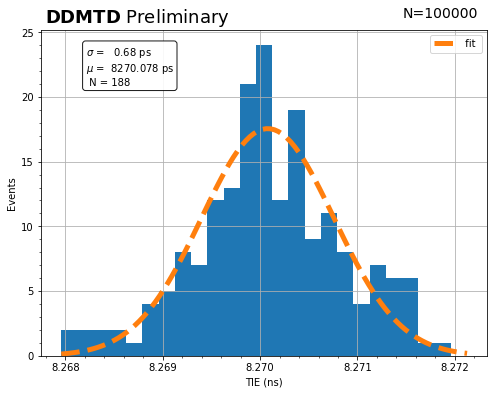

In [42]:
folder_name = f"2021_07_26_{freq}MHz"


tie,tie_err = plot_data(0
             ,channel=5
             ,folder=folder_name
             ,freq = freq*10**6
             ,data_stream = (1,3)
                )

In [22]:
freq=60
folder_name = f"2021_08_03_{freq}MHz"


df = data2df(0
             ,channel=5
             ,folder=folder_name
             ,freq = freq*10**6
             ,data_stream = (1,8)
            )


# tie,tie_err = plot_data(0
#              ,channel=5
#              ,folder=folder_name
#              ,freq = freq*10**6
#              ,data_stream = (1,3)
#                 )

In [23]:
df.TIE_fall

array([  22753. ,   22715.5,   22736.5, ..., -177244. , -177269. ,
       -177284.5])

In [11]:
df

,edge1,ddmtd1,edge2,ddmtd2,edge3,ddmtd3,edge4,ddmtd4,edge5,ddmtd5,edge6,ddmtd6,edge7,ddmtd7,edge8,ddmtd8
0,0,39920,0,0,1,24458,1,1,1,1,1,1,0,1,0,17127
1,0,39920,0,0,1,24458,1,1,1,1,1,1,0,1,0,17127
2,0,39920,0,0,1,24458,1,1,1,1,1,1,0,1,0,17127
3,1,39924,0,0,0,24459,0,2,0,2,0,3,1,4,1,17128
4,0,39928,0,0,1,24465,1,6,1,4,1,6,0,6,0,17134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,1,194689865,0,0,1,194624499,0,192738187,1,192738431,0,192738594,0,192738471,1,194667070
99995,1,194689865,0,0,0,194624500,1,192738190,0,192738436,1,192738596,1,192738474,1,194667070
99996,1,194689865,0,0,1,194624505,0,192738191,1,192738437,0,192738599,0,192738475,1,194667070
99997,1,194689865,0,0,0,194624506,1,192738193,0,192738438,1,192738602,1,192738476,1,194667070


In [5]:
dats = {}
for freq in [60,80,100,120,160]: 
    print(f"Freq: {freq}")    
    data = []
    folder_name = f"2021_08_03_{freq}MHz"
    !../RPi/config_pll.sh {rpi_server} ../RPi/ 2021_07_20_Dispersion/OCXO/Si5344H-RevD-Registers_{freq}M.h 2021_07_20_Dispersion/PLL/Si5344H-RevD-Registers_{freq}M.h
    config_dcps(0,5)
    config_dcps(0,10)
    for delay in range(0,66,8):
        get_data(delay,channel=5,folder=folder_name,aq_iter=100)

Freq: 60
We are in dir::/home/pi/Flash_Firmware
Done Compiling PLLs

TBUFF[2] = 60

RBUFF[0] = 0
RBUFF[1] = 0
RBUFF[2] = 60
address = 0x0514, value = 0x01 ; Value returned = 0x00   
address = 0x001c, value = 0x01 ; Value returned = 0x00   

TBUFF[2] = 47

RBUFF[0] = 0
RBUFF[1] = 0
RBUFF[2] = 47
address = 0x0514, value = 0x01 ; Value returned = 0x00   
address = 0x001c, value = 0x01 ; Value returned = 0x00   
0 delay step selected 
5 channel selected 
Selected Fiber 5
0 delay step selected 
10 channel selected 
Selected Fiber 10 
0 delay step selected 
5 channel selected 
Selected Fiber 5
loading firmware: 2021_07_26_firmware_v1.1.bit.bin
receiving file list ... 
1 file to consider
ddmtd1.txt
     7723219 100%    8.94MB/s    0:00:00 (xfer#1, to-check=0/1)

sent 16730 bytes  received 7520034 bytes  1674836.44 bytes/sec
total size is 7723219  speedup is 1.02
8 delay step selected 
5 channel selected 
Selected Fiber 5
loading firmware: 2021_07_26_firmware_v1.1.bit.bin
receiving file list .

16 delay step selected 
5 channel selected 
Selected Fiber 5
loading firmware: 2021_07_26_firmware_v1.1.bit.bin
receiving file list ... 
1 file to consider
ddmtd1.txt
     7843746 100%    3.05MB/s    0:00:02 (xfer#1, to-check=0/1)

sent 16850 bytes  received 7845769 bytes  1429567.09 bytes/sec
total size is 7843746  speedup is 1.00
24 delay step selected 
5 channel selected 
Selected Fiber 5
loading firmware: 2021_07_26_firmware_v1.1.bit.bin
receiving file list ... 
1 file to consider
ddmtd1.txt
     7843776 100%    5.52MB/s    0:00:01 (xfer#1, to-check=0/1)

sent 16850 bytes  received 7845799 bytes  1747255.33 bytes/sec
total size is 7843776  speedup is 1.00
32 delay step selected 
5 channel selected 
Selected Fiber 5
loading firmware: 2021_07_26_firmware_v1.1.bit.bin
receiving file list ... 
1 file to consider
ddmtd1.txt
     7843742 100%    6.44MB/s    0:00:01 (xfer#1, to-check=0/1)

sent 16850 bytes  received 7845765 bytes  1747247.78 bytes/sec
total size is 7843742  speedup is 1.0

receiving file list ... 
1 file to consider
ddmtd1.txt
     7950323 100%    6.32MB/s    0:00:01 (xfer#1, to-check=0/1)

sent 16982 bytes  received 7952370 bytes  2276957.71 bytes/sec
total size is 7950323  speedup is 1.00
48 delay step selected 
5 channel selected 
Selected Fiber 5
loading firmware: 2021_07_26_firmware_v1.1.bit.bin
receiving file list ... 
1 file to consider
ddmtd1.txt
     7950392 100%    8.89MB/s    0:00:00 (xfer#1, to-check=0/1)

sent 17444 bytes  received 7952439 bytes  2277109.43 bytes/sec
total size is 7950392  speedup is 1.00
56 delay step selected 
5 channel selected 
Selected Fiber 5
loading firmware: 2021_07_26_firmware_v1.1.bit.bin
receiving file list ... 
1 file to consider
ddmtd1.txt
     7950336 100%    5.75MB/s    0:00:01 (xfer#1, to-check=0/1)

sent 17444 bytes  received 7952383 bytes  1771072.67 bytes/sec
total size is 7950336  speedup is 1.00
64 delay step selected 
5 channel selected 
Selected Fiber 5
loading firmware: 2021_07_26_firmware_v1.1.bit.bi

In [6]:
print('done')

done


In [7]:
dats = {}
for freq in [60,80,100,120,160]: 
    print(f"Freq: {freq}")    
    data = []
    folder_name = f"2021_08_03_{freq}MHz"
    !../RPi/config_pll.sh {rpi_server} ../RPi/ 2021_07_20_Dispersion/OCXO/Si5344H-RevD-Registers_{freq}M.h 2021_07_20_Dispersion/PLL/Si5344H-RevD-Registers_{freq}M.h
    config_dcps(0,5)
    config_dcps(0,10)
    for delay in range(0,66,8):
        get_data(delay,channel=10,folder=folder_name,aq_iter=100)

Freq: 60
We are in dir::/home/pi/Flash_Firmware
Done Compiling PLLs

TBUFF[2] = 60

RBUFF[0] = 0
RBUFF[1] = 0
RBUFF[2] = 60
address = 0x0514, value = 0x01 ; Value returned = 0x00   
address = 0x001c, value = 0x01 ; Value returned = 0x00   

TBUFF[2] = 47

RBUFF[0] = 0
RBUFF[1] = 0
RBUFF[2] = 47
address = 0x0514, value = 0x01 ; Value returned = 0x00   
address = 0x001c, value = 0x01 ; Value returned = 0x00   
0 delay step selected 
5 channel selected 
Selected Fiber 5
0 delay step selected 
10 channel selected 
Selected Fiber 10 
0 delay step selected 
10 channel selected 
Selected Fiber 10 
loading firmware: 2021_07_26_firmware_v1.1.bit.bin
receiving file list ... 
1 file to consider
ddmtd1.txt
     7721238 100%    6.05MB/s    0:00:01 (xfer#1, to-check=0/1)

sent 38 bytes  received 7723229 bytes  2206647.71 bytes/sec
total size is 7721238  speedup is 1.00
8 delay step selected 
10 channel selected 
Selected Fiber 10 
loading firmware: 2021_07_26_firmware_v1.1.bit.bin
receiving file lis

16 delay step selected 
10 channel selected 
Selected Fiber 10 
loading firmware: 2021_07_26_firmware_v1.1.bit.bin
receiving file list ... 
1 file to consider
ddmtd1.txt
     7843929 100%    6.67MB/s    0:00:01 (xfer#1, to-check=0/1)

sent 38 bytes  received 7845952 bytes  2241711.43 bytes/sec
total size is 7843929  speedup is 1.00
24 delay step selected 
10 channel selected 
Selected Fiber 10 
loading firmware: 2021_07_26_firmware_v1.1.bit.bin
receiving file list ... 
1 file to consider
ddmtd1.txt
     7843946 100%    6.09MB/s    0:00:01 (xfer#1, to-check=0/1)

sent 38 bytes  received 7845969 bytes  1743557.11 bytes/sec
total size is 7843946  speedup is 1.00
32 delay step selected 
10 channel selected 
Selected Fiber 10 
loading firmware: 2021_07_26_firmware_v1.1.bit.bin
receiving file list ... 
1 file to consider
ddmtd1.txt
     7842849 100%    2.56MB/s    0:00:02 (xfer#1, to-check=0/1)

sent 38 bytes  received 7844872 bytes  1206909.23 bytes/sec
total size is 7842849  speedup is 1.0

receiving file list ... 
1 file to consider
ddmtd1.txt
     7950539 100%    8.25MB/s    0:00:00 (xfer#1, to-check=0/1)

sent 38 bytes  received 7952586 bytes  1767249.78 bytes/sec
total size is 7950539  speedup is 1.00
48 delay step selected 
10 channel selected 
Selected Fiber 10 
loading firmware: 2021_07_26_firmware_v1.1.bit.bin
receiving file list ... 
1 file to consider
ddmtd1.txt
     7950459 100%    6.72MB/s    0:00:01 (xfer#1, to-check=0/1)

sent 38 bytes  received 7952506 bytes  2272155.43 bytes/sec
total size is 7950459  speedup is 1.00
56 delay step selected 
10 channel selected 
Selected Fiber 10 
loading firmware: 2021_07_26_firmware_v1.1.bit.bin
receiving file list ... 
1 file to consider
ddmtd1.txt
     7950745 100%    7.52MB/s    0:00:01 (xfer#1, to-check=0/1)

sent 38 bytes  received 7952792 bytes  1767295.56 bytes/sec
total size is 7950745  speedup is 1.00
64 delay step selected 
10 channel selected 
Selected Fiber 10 
loading firmware: 2021_07_26_firmware_v1.1.bit.bi

In [8]:
print('done')

done


In [11]:
dats = {}
for freq in [60,80,100,160]: 
    print(f"Freq: {freq}")    
    data = []
    folder_name = f"2021_08_03_{freq}MHz"
    for delay in range(0,66,8):
        print(f'processing delay: {delay}' )
        tie,tie_err = plot_data(delay
             ,channel=5
             ,folder=folder_name
             ,freq = freq*10**6
             ,data_stream = (1,3)
                )
        data.append((delay, tie, tie_err))
        plt.close()
#         break
#     break
    dat = np.asarray(data).T
    dats[str(freq)] = dat

Freq: 60
processing delay: 0
ERROR! Session/line number was not unique in database. History logging moved to new session 62
processing delay: 8
processing delay: 16
processing delay: 24
processing delay: 32
processing delay: 40
processing delay: 48
processing delay: 56
processing delay: 64
Freq: 80
processing delay: 0
processing delay: 8
processing delay: 16
processing delay: 24
processing delay: 32
processing delay: 40
processing delay: 48
processing delay: 56
processing delay: 64
Freq: 100
processing delay: 0
processing delay: 8
processing delay: 16
processing delay: 24
processing delay: 32
processing delay: 40
processing delay: 48
processing delay: 56
processing delay: 64
Freq: 160
processing delay: 0
processing delay: 8
processing delay: 16
processing delay: 24
processing delay: 32
processing delay: 40
processing delay: 48
processing delay: 56
processing delay: 64


In [12]:
import matplotlib
matplotlib.style.use(['seaborn-dark','science'])
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['figure.dpi'] = 200

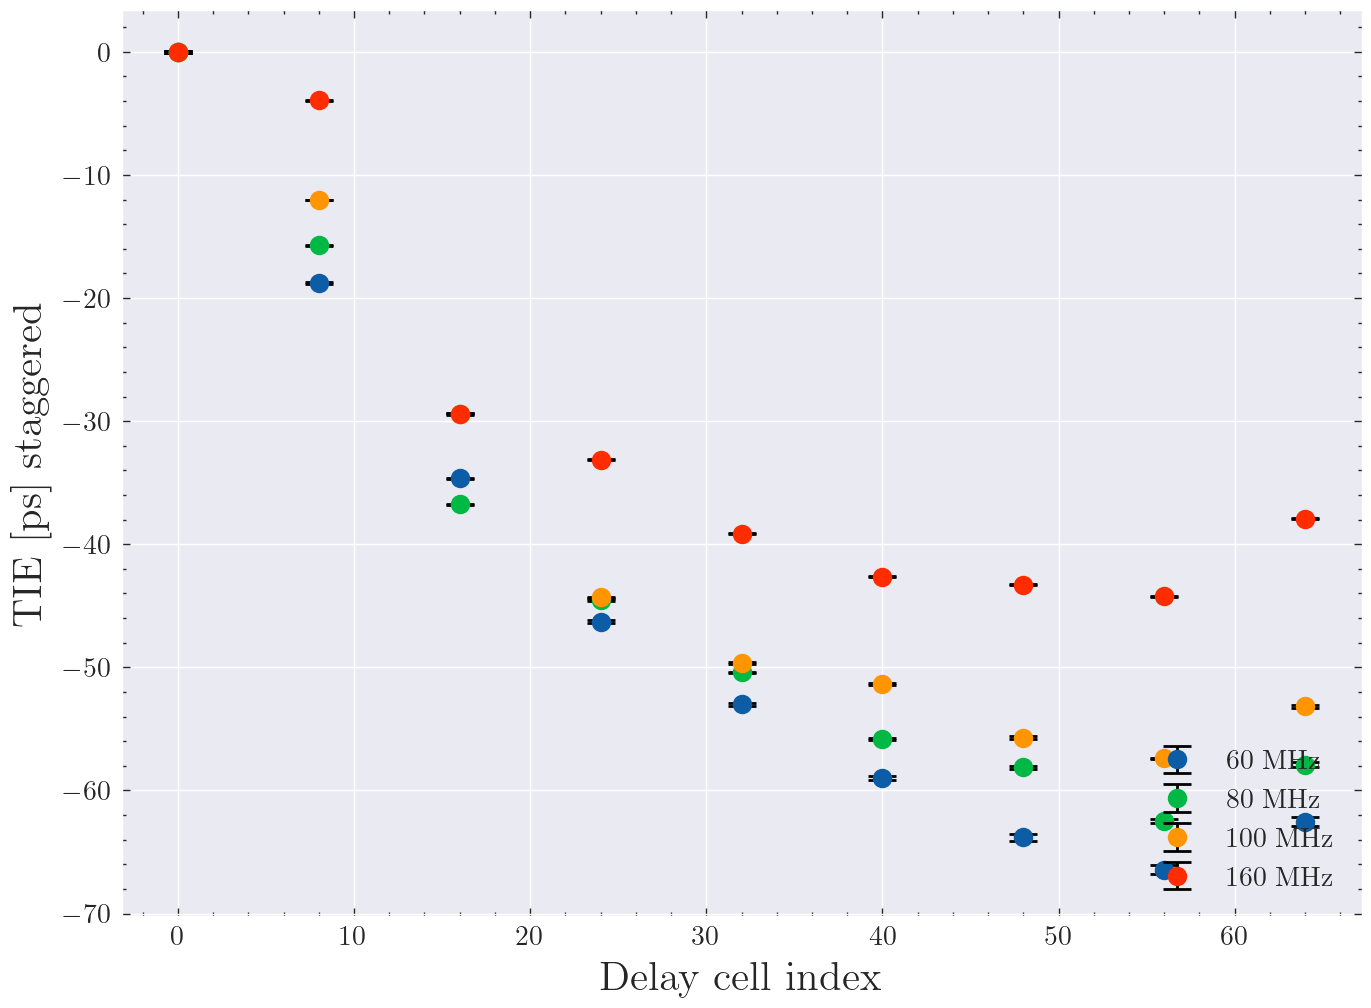

In [13]:
f,ax = plt.subplots(figsize=(8,6))


for key in dats.keys():
    
    ax.errorbar(dats[key][0],dats[key][1]-dats[key][1][0],yerr=dats[key][2],fmt='o',
#                         color='red',
                        capsize=5,
                        ecolor='black'
                        ,label=f'{key} MHz'
                       )
#     break
plt.xlabel("Delay cell index", fontsize=15)
plt.ylabel("TIE [ps] staggered", fontsize=15)
plt.legend(loc="lower right")
plt.gca().grid()
# plt.ylim(-8,-7)

In [20]:
dats = {}
for freq in [60,80,100,120,160]: 
    print(f"Freq: {freq}")    
    data = []
    folder_name = f"2021_08_03_{freq}MHz"
    for delay in range(0,66,8):
        print(f'processing delay: {delay}' )
        tie,tie_err = plot_data(delay
             ,channel=10
             ,folder=folder_name
             ,freq = freq*10**6
             ,data_stream = (1,8)
                )
        data.append((delay, tie, tie_err))
        plt.close()
#         break
#     break
    dat = np.asarray(data).T
    dats[str(freq)] = dat

Freq: 60
processing delay: 0
processing delay: 8
processing delay: 16
processing delay: 24
processing delay: 32
processing delay: 40
processing delay: 48
processing delay: 56
processing delay: 64
Freq: 80
processing delay: 0
processing delay: 8
processing delay: 16
processing delay: 24
processing delay: 32
processing delay: 40
processing delay: 48
processing delay: 56
processing delay: 64
Freq: 100
processing delay: 0
processing delay: 8
processing delay: 16
processing delay: 24
processing delay: 32
processing delay: 40
processing delay: 48
processing delay: 56
processing delay: 64
Freq: 120
processing delay: 0
processing delay: 8
processing delay: 16
processing delay: 24
processing delay: 32
processing delay: 40
processing delay: 48
processing delay: 56
processing delay: 64
Freq: 160
processing delay: 0
processing delay: 8
processing delay: 16
processing delay: 24
processing delay: 32
processing delay: 40
processing delay: 48
processing delay: 56
processing delay: 64


In [78]:
f=2
print("{:.3f} {:.3f}".format(5,6))

5.0006.000


Text(0.5, 1.0, 'DCPS Channel-10 vs CLK REF')

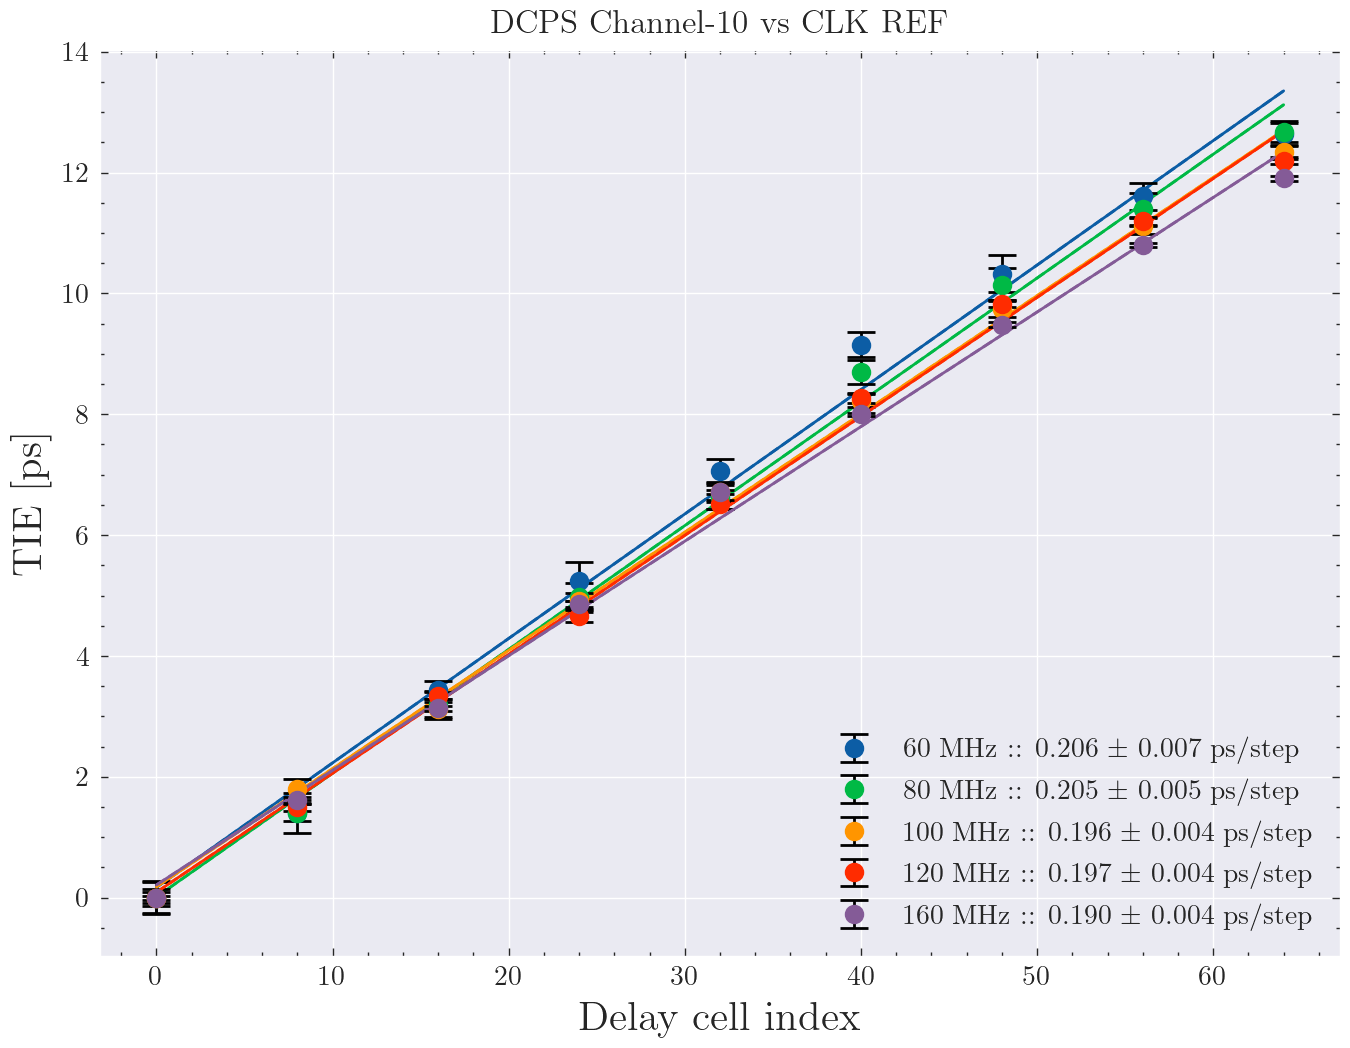

In [114]:
f,ax = plt.subplots(figsize=(8,6))


for key in dats.keys():
    X = dats[key][0]
    Y = (dats[key][1]-dats[key][1][0])
    Y_err = dats[key][2]



    
    discard_data = 9
    popt,pcov = np.polyfit(X[:discard_data],Y[:discard_data],1,cov=True)
#     print(*)
    p=ax.plot( X[:discard_data], np.polyval(popt,X[:discard_data]),linestyle='-',linewidth=1)
    line_color = p[0].get_color()


    p=ax.plot( X, np.polyval(popt,X),color = line_color,linestyle='--',linewidth=1)
    p = ax.errorbar(X,Y,yerr=Y_err,fmt='o',
                        color=line_color,
                        capsize=5,
                        ecolor='black'
                        ,label=f'{key:s} MHz :: {popt[0]:0.3f} $\pm$  {np.sqrt(np.diag(pcov))[0]:0.3f}   ps/step'
                       )

#     break
plt.xlabel("Delay cell index", fontsize=15)
plt.ylabel("TIE [ps]", fontsize=15)
plt.legend(loc="lower right")
plt.gca().grid()
# plt.ylim(-8,-7)
plt.title("DCPS Channel-10 vs CLK REF")

True


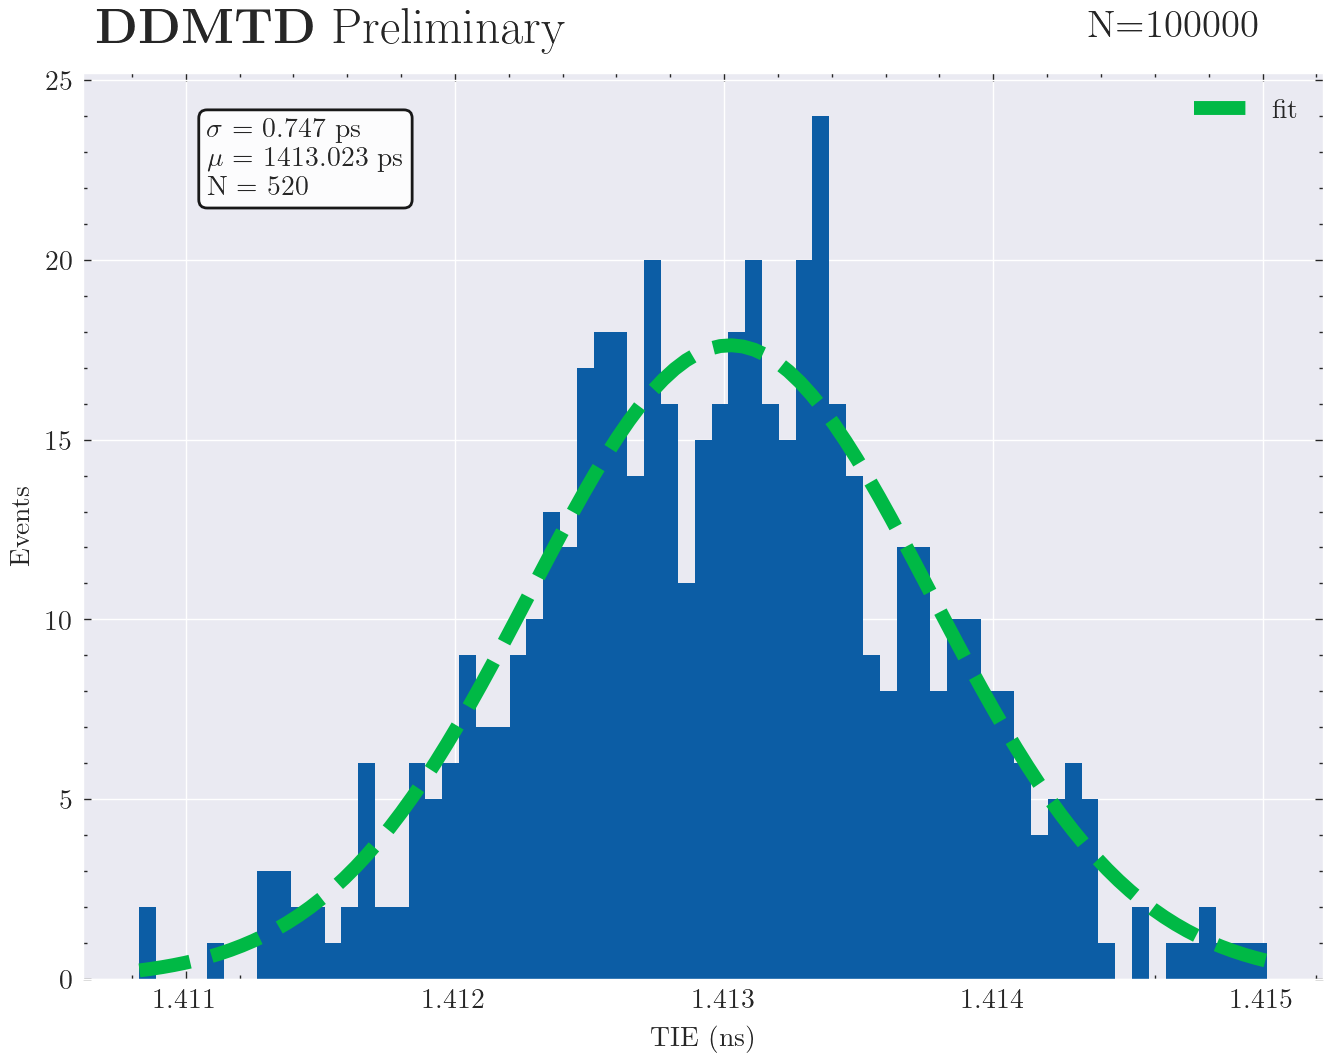

In [33]:
freq=160
folder_name = f"2021_08_03_{freq}MHz"
tie,tie_err = plot_data(0
             ,channel=10
             ,folder=folder_name
             ,freq = freq*10**6
             ,data_stream = (1,8)
             ,draw=True
                )